In [244]:
n_neighbors_x = 0
min_dist_x = 0
n_components_x = 2
metric_x = 0
premitive_data_size = 750
dimension_batch_size = 750
shard_batch_size = 0
cluster_size = 2
we = 1000



In [245]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap
%matplotlib inline

In [246]:
df = pd.read_csv('fashion-mnist_test.csv')
print('The shape of testing dataset : ', df.shape)
df = df.loc[df['label'].isin([0,1])]

The shape of testing dataset :  (10000, 785)


In [247]:
df['label']
df = df.dropna()
df.label.value_counts()

label
0    1000
1    1000
Name: count, dtype: int64

In [1]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

NameError: name 'sns' is not defined

In [249]:
vals = df.drop('label', axis=1).values
total_data = StandardScaler().fit_transform(vals)
prime_data = total_data[:,:premitive_data_size]
total_data = total_data[:,premitive_data_size:]
total_data.shape[1]

34

In [250]:
batchs = []
for i in range(0, total_data.shape[1], dimension_batch_size - shard_batch_size):
    ofsset = min(i+dimension_batch_size,  total_data.shape[1])
    b = total_data[:,i:ofsset]
    batchs.append(b)
len(batchs)

1

In [251]:
reducer = umap.UMAP(n_components=n_components_x)

In [252]:
u_baches = []
for b in batchs:
    emb = reducer.fit_transform(b)
    u_baches.append(emb)

In [253]:
current_emb = reducer.fit_transform(prime_data)
print(current_emb.shape)
for i in range(len(u_baches)):
    df0 = pd.DataFrame(current_emb, columns = ['A','B'])
    df1 = pd.DataFrame(u_baches[i], columns = ['C','D'])
    result = pd.concat([df0, df1], axis=1)
    penguin_data3 = result[["A","B","C","D",]].values
    scaled_penguin_data3 = StandardScaler().fit_transform(penguin_data3)
    new_emb = reducer.fit_transform(scaled_penguin_data3)
    current_emb = new_emb

(2000, 2)


In [254]:
embedding = reducer.fit_transform(total_data)
total_data.shape

(2000, 34)

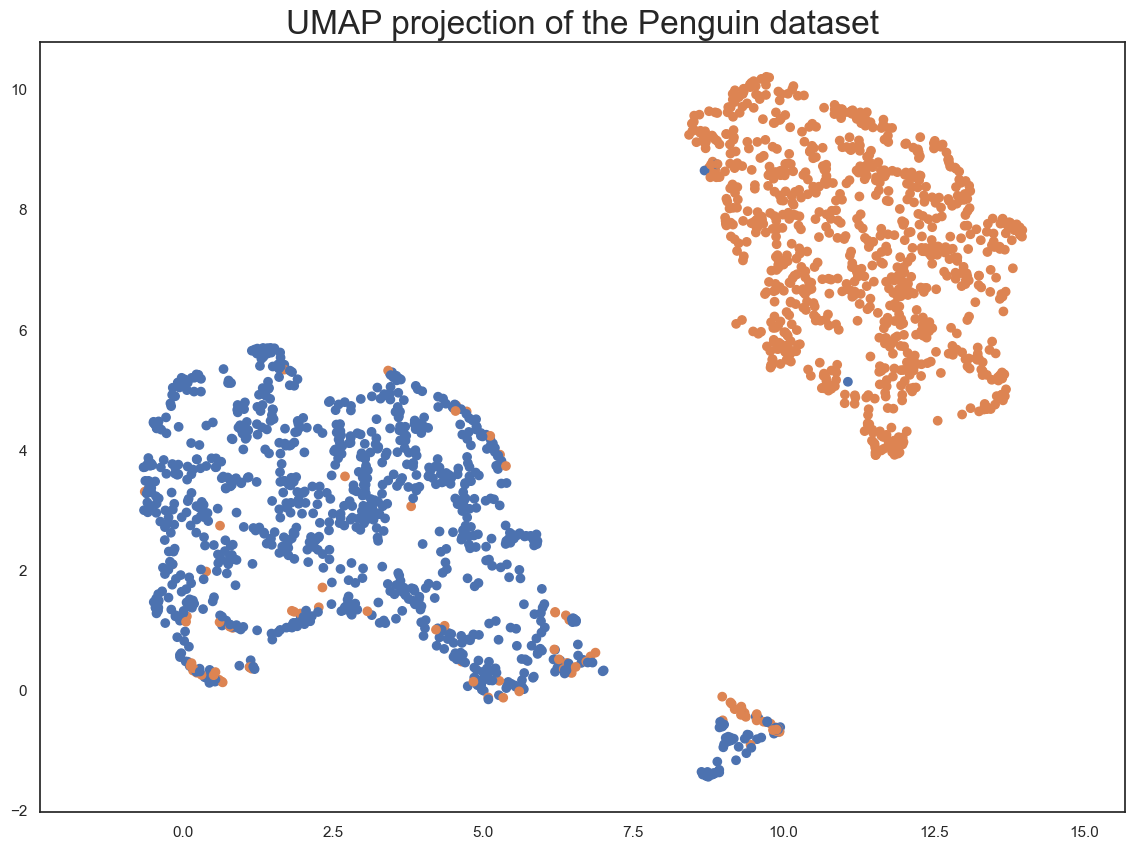

In [255]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df.label.map({0:0, 1:1})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24);

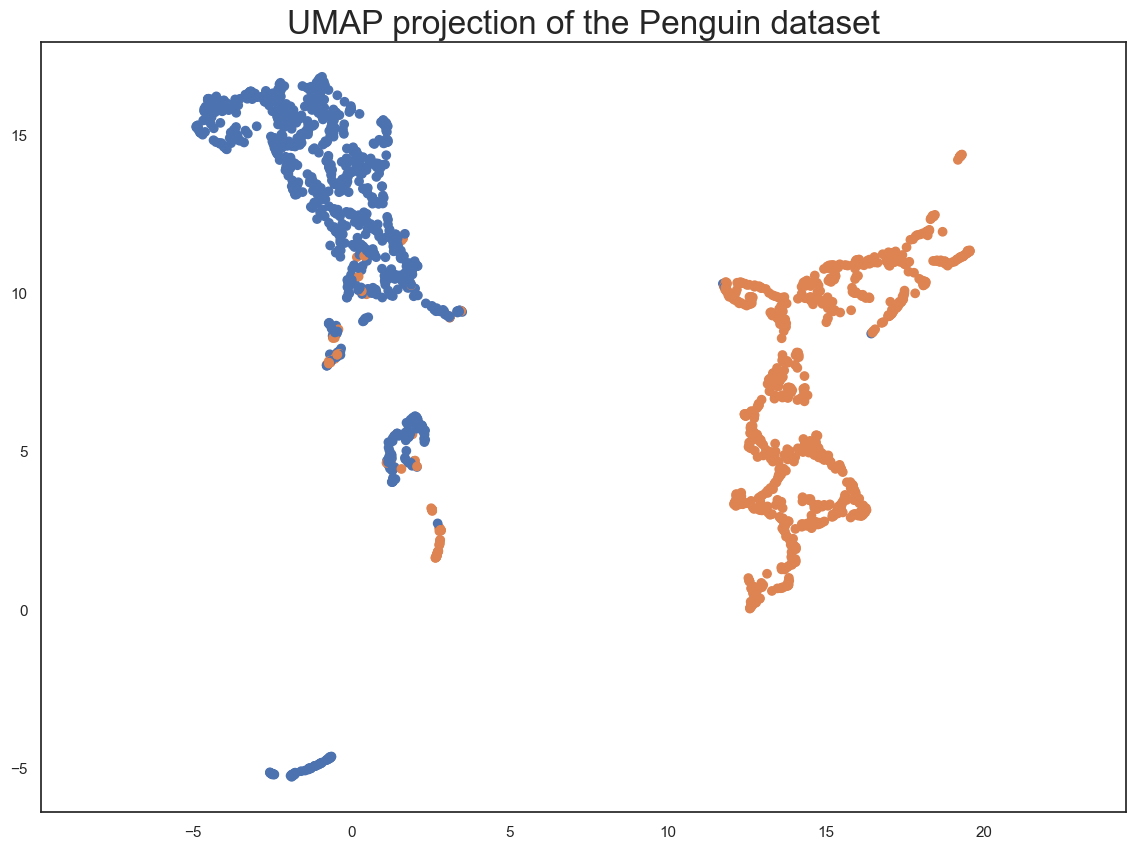

In [256]:
plt.scatter(
    current_emb[:, 0],
    current_emb[:, 1],
    c=[sns.color_palette()[x] for x in df.label.map({0:0, 1:1})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24);